# Plots for the paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np, glob, healpy as H, os, sys
from pylab import *

In [3]:
rcParams['figure.dpi'] = 150
rcParams['figure.facecolor'] = 'white'

In [4]:
folder_with_results = 'files_for_paper/'
plfolder = 'plots/'
fsval = 12

if not os.path.exists( plfolder ): os.system('mkdir -p %s' %(plfolder))

In [5]:
def format_axis(ax,fx,fy,maxxloc=None):
    for label in ax.get_xticklabels(): label.set_fontsize(fx)
    for label in ax.get_yticklabels(): label.set_fontsize(fy)
    if maxxloc is not None:
        ax.yaxis.set_major_locator(MaxNLocator(nbins=maxxloc))
        ax.xaxis.set_major_locator(MaxNLocator(nbins=maxxloc))

    return ax


# Figure 1:
## Delensed residuals as a $\mathcal{f}$(noise level)

dict_keys([0.1, 0.2, 1.0, 2.0])
0.1
0.2
1.0
2.0


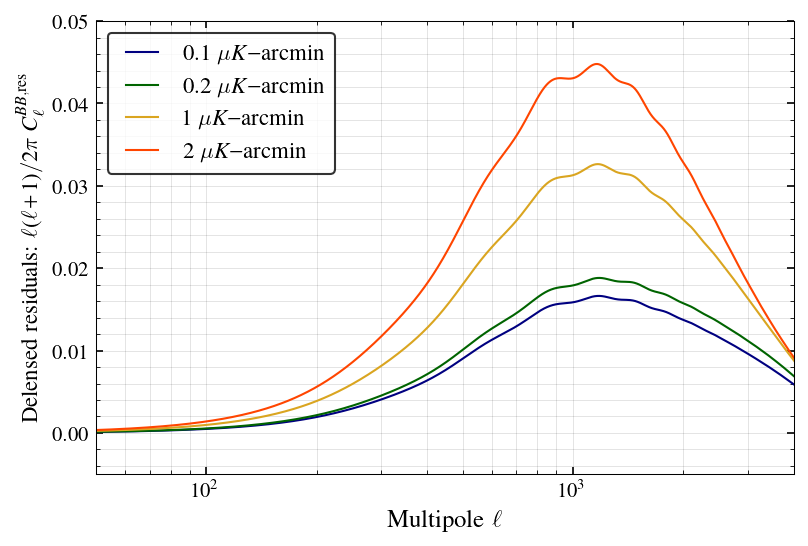

In [6]:
fname = '%s/delensedpower.npy' %(folder_with_results)
pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())#; sys.exit()

noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 1.: 'goldenrod', 2.: 'orangered'}
clf()
xmin, xmax = 50., 4000.
ymin, ymax = -0.005, 0.05
xscaleval = 'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
for noiseval in sorted(pl_dict):
    print(noiseval)
    curr_cl_bb = pl_dict[noiseval]
    els = np.arange( len(curr_cl_bb) )
    dl_fac = els * (els+1) / 2/ np.pi
    plot(els, dl_fac * curr_cl_bb, color = noise_color_dic[noiseval], label = r'%g $\mu K{\rm -arcmin}$' %(noiseval))
legend(loc = 2, fontsize = fsval-1)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals: $\ell(\ell+1)/2\pi\ C_{\ell}^{BB, {\rm res}}$', fontsize = fsval-1)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_for_different_noise_levels.pdf'
savefig(plname, dpi = 200.)
show()


# Figure 2:
## Delensed residuals as a $\mathcal{f}$(noise level) compared with original lensed BB power.

(4999,)
dict_keys([0.1, 0.2, 1.0, 2.0])
0.1
0.2
0.5
1.0
2.0


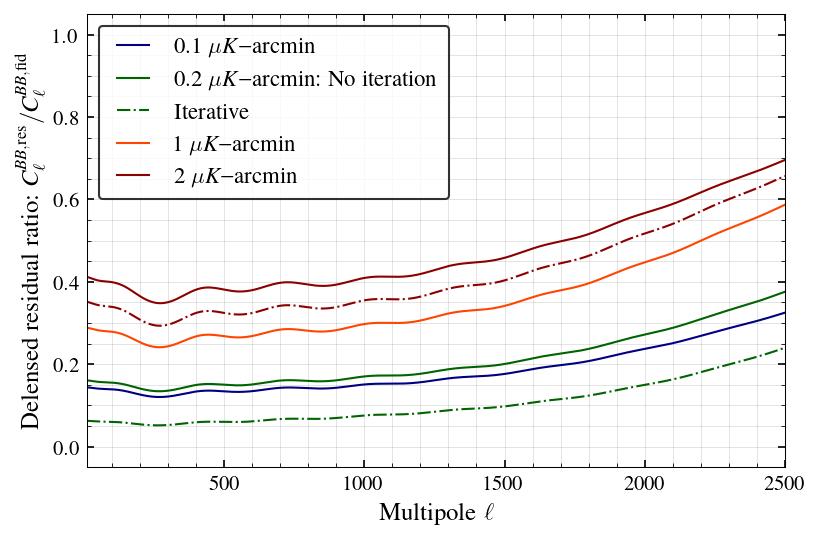

In [7]:
cl_bb_fid_name = '%s/clBB_fiducial.npy' %(folder_with_results)
cl_bb_fid = np.load(cl_bb_fid_name, allow_pickle=True)
print(cl_bb_fid.shape)

fname = '%s/delensedpower.npy' %(folder_with_results)
delensed_dict = np.load(fname, allow_pickle=True).item()
print(delensed_dict.keys())#; sys.exit()

fname = '%s/delensedpower_iter1st_temp_gamma1.0.npy' %(folder_with_results)
iter_delensed_dict = np.load(fname, allow_pickle=True).item()
#print(iter_delensed_dict.keys())#; sys.exit()


noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 0.5: 'goldenrod', 1.: 'orangered', 2.: 'darkred'}
##noise_color_dic = {0.2: 'navy', 1.: 'darkgreen', 2.: 'orangered'}
clf()
xmin, xmax = 10., 2500.
ymin, ymax = -0.05, 1.05
xscaleval = None #'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
cntr = 1
for noiseval in sorted(noise_color_dic):
    print(noiseval)
    if noiseval in delensed_dict:
        curr_cl_bb = delensed_dict[noiseval]
    else:
        continue
    els = np.arange( len(curr_cl_bb) )
    dl_fac = els * (els+1) / 2/ np.pi
    delensing_residual_ratio = curr_cl_bb / cl_bb_fid    
    if noiseval == 0.2: ##cntr == 1:
        labval = r'%g $\mu K{\rm -arcmin}$: No iteration' %(noiseval)
    else:
        labval = r'%g $\mu K{\rm -arcmin}$' %(noiseval)
    plot(els, delensing_residual_ratio, color = noise_color_dic[noiseval], label = labval)
    if noiseval in iter_delensed_dict:
        curr_cl_bb_iter = iter_delensed_dict[noiseval]
        iter_delensing_residual_ratio = curr_cl_bb_iter / cl_bb_fid
        
        if noiseval == 0.2: ##if cntr == 1:
            labval = r'Iterative'
        else:
            labval = None
        plot(els, iter_delensing_residual_ratio, color = noise_color_dic[noiseval], ls = '-.', label = labval)
    #delensing_eff = (cl_bb_fid - curr_cl_bb) / cl_bb_fid
    #plot(els, delensing_eff, color = noise_color_dic[noiseval], ls = '-.')
    cntr+=1
legend(loc = 2, fontsize = fsval-1)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residual ratio: $C_{\ell}^{BB, {\rm res}} / C_{\ell}^{BB, {\rm fid}}$', fontsize = fsval)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_residuals_ratio_for_different_noise_levels.pdf'
savefig(plname, dpi = 200.)
show()

# Figure 3:
## Delensed residuals as a $\mathcal{f}(\gamma_{0})$

No handles with labels found to put in legend.


dict_keys([0.2, '0.2guess', 0.5, '0.5guess', 2.0, '2.0guess'])


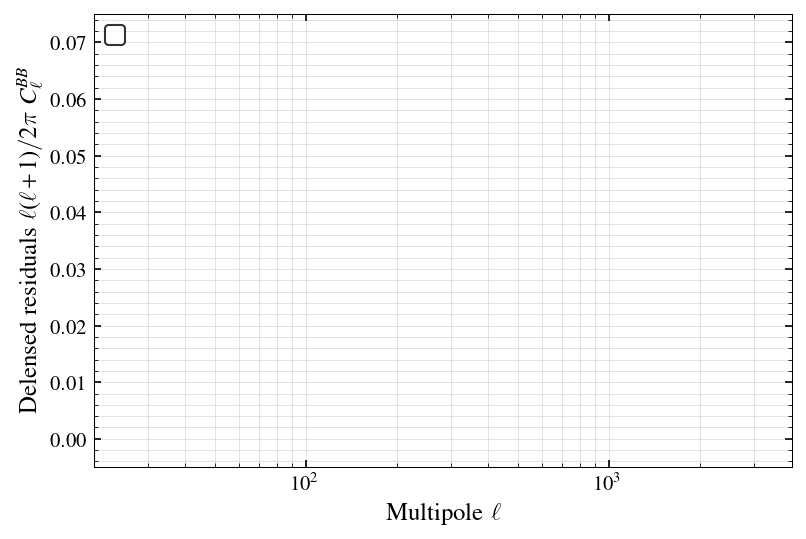

In [8]:
if (1):
    #noise = 2 uK-arcmin
    #reqd_gamma_arr = [0.9] #[0.8, 0.95]
    #fname = '%s/delensedpower_new_intep_gamma%s.npy' %(folder_with_results, reqd_gamma)
    reqd_gamma_val = 0.9
    #fname = '%s/delensedgamma%ss.npy' %(folder_with_results, reqd_gamma_val)
    fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

    #fname = '%s/delensedgamma1.1s.npy' %(folder_with_results)
    pl_dict = np.load(fname, allow_pickle=True).item()
    print(pl_dict.keys()); ##sys.exit()

    gamma_color_dic = {0.8: 'navy', 0.9: 'darkgreen', 1.: 'goldenrod', 1.1: 'orangered', 1.15: 'darkred'}
    clf()
    fsval = 12
    xmin, xmax = 20., 4000.
    ymin, ymax = -0.005, 0.075
    xscaleval = 'log'
    yscaleval = None
    ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
    for keyname in pl_dict:
        if isinstance(keyname, str):
            if keyname.find('guess')>-1: continue
        else:
            pass #continue
        #if keyname in ['guess1.25', 'guess1.35', 'guess1.45']: continue
        if keyname in ['guess1.25', 'guess1.35', 'guess1.45']: continue
        if keyname not in gamma_color_dic: continue
        print(keyname)
        curr_res = pl_dict[keyname]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi
        plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{0} = %g$' %(keyname))
    legend(loc = 2, fontsize = fsval-2)
    xlabel(r'Multipole $\ell$', fontsize = fsval)
    ylabel(r'Delensed residuals $\ell(\ell+1)/2\pi\ C_{\ell}^{BB}$', fontsize = fsval)
    xlim(xmin, xmax); ylim(ymin, ymax)
    grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
    plname = 'plots/delensed_BB_residuals_for_gamma%s.pdf' %(reqd_gamma_val)
    savefig(plname, dpi = 200.)
    show()


# Figure 3:
## Biased delensed residuals as a $\mathcal{f}(\gamma_{\phi}, \gamma_{0})$

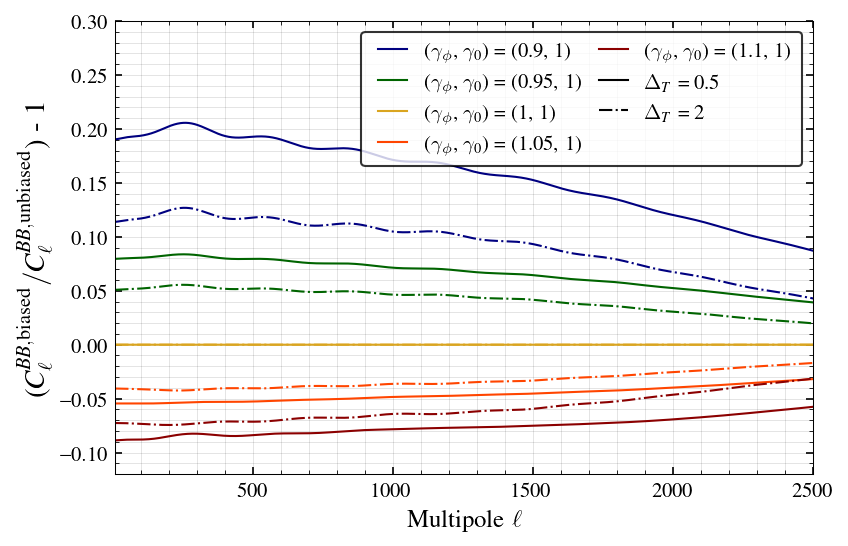

In [10]:
reqd_noise_val_arr = [0.5, 2.0]

#gamma_color_dic = {0.8: 'navy', 0.9: 'darkgreen', 1.: 'goldenrod', 1.1: 'orangered', 1.15: 'darkred'}
gamma_color_dic = {0.9: 'navy', 0.95: 'darkgreen', 1.: 'goldenrod', 1.05: 'orangered', 1.1: 'darkred'}
#gamma_color_dic = {0.9: 'navy', 1.: 'goldenrod'}
pl_dict = {}
for reqd_noise_val in reqd_noise_val_arr:
    pl_dict[reqd_noise_val] = {}
    for keyname in gamma_color_dic:
        fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, keyname)
        res_dict = np.load(fname, allow_pickle=True).item()
        curr_res = res_dict[reqd_noise_val]
        pl_dict[reqd_noise_val][keyname] = curr_res
        ##print(keyname, pl_dict[keyname])

        '''
        curr_res_guess = pl_dict['%sguess' %(reqd_noise_val)]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi


        plot(els, dl_fac * curr_res, color = gamma_color_dic[keyname], label = r'$\gamma_{\phi} = %g$' %(keyname))
        ###plot(els, dl_fac * curr_res_guess, color = gamma_color_dic[keyname], linestyle = '--',label = r'$\gamma_{\phi} = %g$' %(keyname))
        '''

clf()
fsval = 12
xmin, xmax = 10., 2500.
ymin, ymax = -.12, 0.3
xscaleval = None #'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
baseline_keyname = 1.0
for noisecntr, reqd_noise_val in enumerate( reqd_noise_val_arr ):
    if reqd_noise_val == 0.5:
        lsval = '-'
    elif reqd_noise_val == 2.0:
        lsval = '-.'
    for kcntr, keyname in enumerate( gamma_color_dic ):
        labval = r'($\gamma_{\phi}$, $\gamma_{0}$) = (%g, %s)' %(keyname, 1)
        if noisecntr == 1:
            labval = None
        curr_bb_bias = (pl_dict[reqd_noise_val][keyname] - pl_dict[reqd_noise_val][baseline_keyname])/pl_dict[reqd_noise_val][baseline_keyname]
        plot(els, curr_bb_bias, color = gamma_color_dic[keyname], ls = lsval, label = labval)
        
for noisecntr, reqd_noise_val in enumerate( reqd_noise_val_arr ):
    if reqd_noise_val == 0.5:
        lsval = '-'
    elif reqd_noise_val == 2.0:
        lsval = '-.'
    plot([], [], color = 'black', label = r'$\Delta_{T}$ = %g' %(reqd_noise_val), ls = lsval)

axhline(1., lw = 0.5)
legend(loc = 1, fontsize = fsval-2, ncol = 2, columnspacing = 0.5, handletextpad = 0.5)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'($C_{\ell}^{BB, {\rm biased}}/C_{\ell}^{BB, {\rm unbiased}}$) - 1', fontsize = fsval+2)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_bias_for_gammaphi.pdf'
savefig(plname, dpi = 200.)
show()


# Figure 4:
## Using delensed residuals to find best-fit $\gamma_{0}$

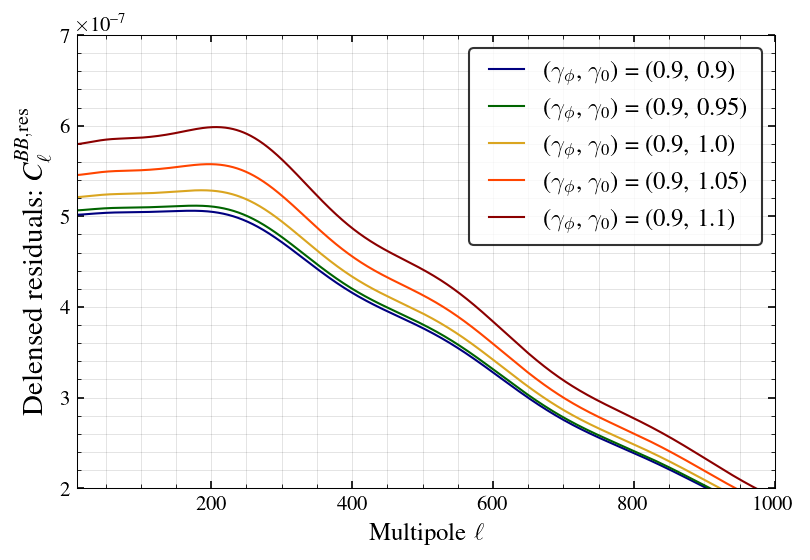

In [11]:
reqd_noise_val_arr = [0.5]#, 2.0]

reqd_gammaphi = 0.9
fname = '%s/guess/delensedpower_iter0_guess_gamma%s.npy' %(folder_with_results, reqd_gammaphi)
res_dict = np.load(fname, allow_pickle=True).item()
gamma_zero_color_dic = {0.9: 'navy', 0.95: 'darkgreen', 1.: 'goldenrod', 1.05: 'orangered', 1.1: 'darkred'}
pl_dict = {}
for reqd_noise_val in reqd_noise_val_arr:
    pl_dict[reqd_noise_val] = {}
    for gamma0_keyname in gamma_color_dic:
        curr_res = res_dict[reqd_noise_val]['guess%s' %(gamma0_keyname)]
        pl_dict[reqd_noise_val][gamma0_keyname] = curr_res

clf()
fsval = 12
xmin, xmax = 10., 1000.
ymin, ymax = 2e-7, 7e-7
xscaleval = None #'log'
yscaleval = None
ax = subplot(111, xscale = xscaleval, yscale = yscaleval)
baseline_gamma0 = reqd_gammaphi
for noisecntr, reqd_noise_val in enumerate( reqd_noise_val_arr ):
    if reqd_noise_val == 0.5:
        lsval = '-'
    elif reqd_noise_val == 2.0:
        lsval = '-.'
    for kcntr, gamma0_keyname in enumerate( gamma_color_dic ):
        labval = r'($\gamma_{\phi}$, $\gamma_{0}$) = (%g, %s)' %(reqd_gammaphi, gamma0_keyname)
        if noisecntr == 1:
            labval = None
        '''
        curr_bb_bias = (pl_dict[reqd_noise_val][gamma0_keyname] - pl_dict[reqd_noise_val][baseline_gamma0])/pl_dict[reqd_noise_val][baseline_keyname]
        plot(els, curr_bb_bias, color = gamma_color_dic[gamma0_keyname], ls = lsval, label = labval)
        '''
        curr_bb = pl_dict[reqd_noise_val][gamma0_keyname]
        dl_fac = 1. #els * (els+1)/2/np.pi
        plot(els, dl_fac * curr_bb, color = gamma_color_dic[gamma0_keyname], ls = lsval, label = labval)

'''
for noisecntr, reqd_noise_val in enumerate( reqd_noise_val_arr ):
    if reqd_noise_val == 0.5:
        lsval = '-'
    elif reqd_noise_val == 2.0:
        lsval = '-.'
    plot([], [], color = 'black', label = r'$\Delta_{T}$ = %g' %(reqd_noise_val), ls = lsval)
'''

legend(loc = 1, fontsize = fsval, ncol = 1, columnspacing = 0.5, handletextpad = 0.5)
xlabel(r'Multipole $\ell$', fontsize = fsval)
ylabel(r'Delensed residuals: $C_{\ell}^{BB, {\rm res}}$', fontsize = fsval+2)
xlim(xmin, xmax); ylim(ymin, ymax)
grid(True, which = 'both', axis = 'both', lw = 0.25, alpha = 0.2)
plname = 'plots/delensed_BB_for_different_gamma0.pdf'
savefig(plname, dpi = 200.)
show()


# Figure 4:
## Delensed residuals as a $\mathcal{f}$(noiselevel) 

dict_keys([0.1, '0.1guess', 0.2, '0.2guess', 0.5, '0.5guess', 1.0, '1.0guess', 2.0, '2.0guess'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

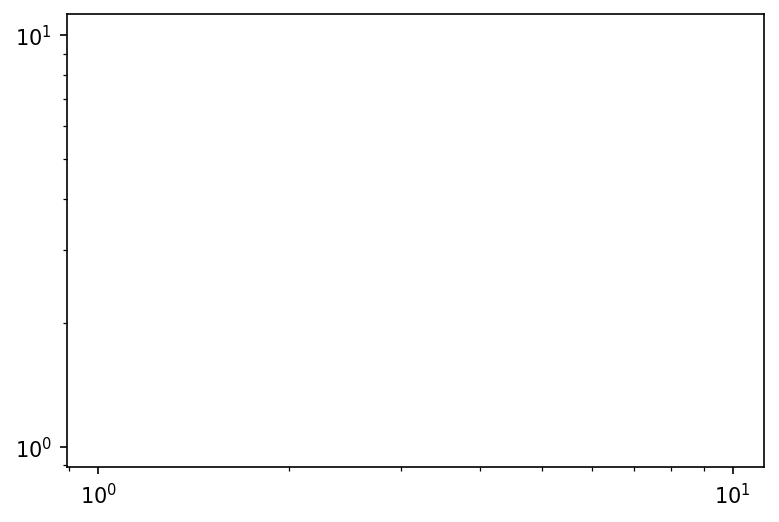

In [30]:
reqd_noise_level_arr = [0.2, 0.5, 2.0]
#fname = '%s/cresiter_new_intep_gamma0.95.npy' %(folder_with_results)
#fname = '%s/delensedpoweriter_new_intep_gamma0.9.npy' %(folder_with_results)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())

clf()
ax = subplot(111, xscale = 'log', yscale = 'log')
for reqd_noise_level in reqd_noise_level_arr:
    for keyname in pl_dict[reqd_noise_level]:
        curr_res = pl_dict[reqd_noise_level][keyname]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi
        plot(els, dl_fac * curr_res)
show()

dict_keys([0.1, '0.1guess', 0.2, '0.2guess', 0.5, '0.5guess', 1.0, '1.0guess', 2.0, '2.0guess'])


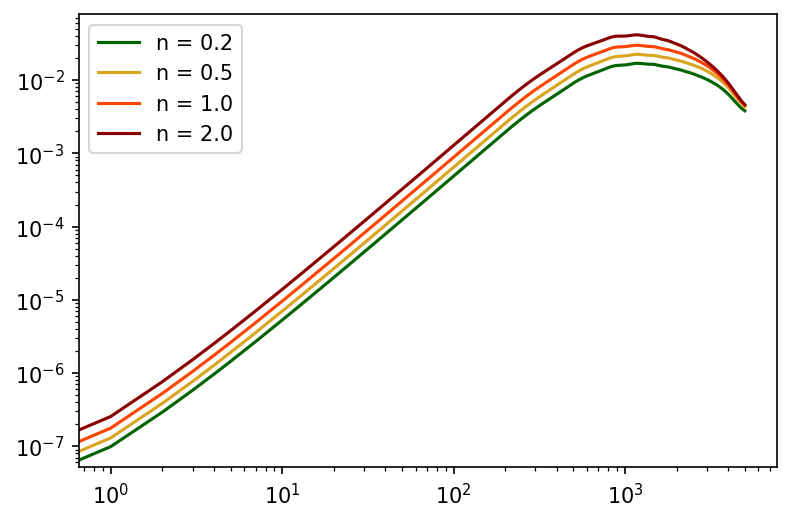

In [41]:
reqd_noise_level_arr = [0.2, 0.5, 1.0, 2.0]
#fname = '%s/cresiter_new_intep_gamma0.95.npy' %(folder_with_results)
#fname = '%s/delensedpoweriter_new_intep_gamma0.9.npy' %(folder_with_results)
fname = '%s/delensedpower_iter0_gamma%s.npy' %(folder_with_results, reqd_gamma_val)

pl_dict = np.load(fname, allow_pickle=True).item()
print(pl_dict.keys())
noise_color_dic = {0.1: 'navy', 0.2: 'darkgreen', 0.5: 'goldenrod', 1.0: 'orangered', 2.0: 'darkred'}

clf()
ax = subplot(111, xscale = 'log', yscale = 'log')
for reqd_noise_level in reqd_noise_level_arr:
        curr_res = pl_dict[reqd_noise_level]
        els = np.arange( len(curr_res) )
        dl_fac = els * (els+1) / 2/ np.pi
        plot(els, dl_fac * curr_res,color = noise_color_dic[reqd_noise_level], label = r'n = %s' %(reqd_noise_level))
        #plot(els, dl_fac * curr_res, )
plt.legend()
show()

## Fisher result

In [11]:
import numpy as np
fisher_file_dir = '/home/chunyul3/lensing_sys_fisher/ForNote'

Fmatlen = np.load('%s/F_nongau_mat_iter0_totalgphi4all_n1.0_noPhi.npy'%(fisher_file_dir))
Fmatunlen = np.load('%s/F_nongau_mat_iter0_unlensed_totalgphi4all_n1.0_noPhi.npy'%(fisher_file_dir))
Fmatdelensys = np.load('%s/F_nongau_mat_iter0_delensed_scalargphi4all_n1.0_noPhi.npy'%(fisher_file_dir))

fsky = 0.036

print(nophi_total.shape, nophi_delen.shape,len(param_list_sys))
param_list_sys = ['As', 'gamma_phi_sys', 'mnu','neff','ns', 'ombh2', 'omch2', 'r', 'tau', 'thetastar']

(10, 10) (10, 10) 10


In [9]:
p1 = 'neff'
i = param_list_sys.index(p1)

In [16]:
delensys_covmat = np.matrix(Fmatdelensys* fsky).I
delensys_sigma_inv = np.diag(delensys_covmat)**0.5
delen_covmat = np.column_stack((delensys_sigma_array_bin5_inv[:,0], delensys_sigma_array_bin5_inv[:,2:]))
delen_sigma_inv_short = np.diag(delen_covmat)**0.5
#Fmatdelensys = np.matrix(Fmatdelensys) * fsky

/tmp/ipykernel_1065096/2886270138.py:4: RuntimeWarning: invalid value encountered in sqrt
  delen_sigma_inv_short = np.diag(delen_covmat)**0.5


In [ ]:
plt.semilogx(rms_map_T_list, len_sigma_array_bin5_inv[:,i],'blue', label = 'lensed')
plt.semilogx(rms_map_T_list, lensys_sigma_array_bin5_inv_short[:,i],'blue', linestyle = '-.',label = 'lensedsys')